In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

## 매개변수 갱신 

신경망 학습의 목적은 손실 함수의 값을 가능한 낮추는 매개변수를 찾는 것이다. 이는 곧 매개변수의 최적값을 찾는 문제이며, 이러한 문제를 푸는 것을 최적화라고 한다. 



## 확률적 경사 하강법 (SGD) 

<img src="https://t1.daumcdn.net/cfile/tistory/9978B5465AA8029F22" width="200" height="300"/> 

W는 갱신할 가중치 매개변수이고 미분값은 W에 대한 손실 함수의 기울기 이다. n는 학습률의 의미한다. <-는 우변의 값으로 좌변의 값을 갱신한다는 뜻이다. 





In [1]:
class SGD :
    def __init__ (self, lr = 0.01)  :
        self.lr = lr
        
    def update (self, params, grads) :
        for k in params.keys() :
            params[k] -= self.lr * grads[k ]

### SGD 의 단점 

SGD는 단순하고 구현도 쉽지만, 문제에 따라서는 비효율적일 때가 있다. SGD는 비등방성(anisotropy)함수이기 때문이다. 방향에 따라 성질, 즉 기울기가 달라진다는 의미이다. SGD가 지그재그로 탐색하는 근본 원인은 기울어진 방향이 본래의 최솟값과 다른 방향을 가리켜서라는 점도 고려해봐야 한다. 

## 모멘텀(Momentum) 

<img src="https://blog.kakaocdn.net/dn/bmYcIj/btqJZopKIwQ/BTg82XwDLnVH2rsxZBnXEK/img.png" width="200" height="300"/> 

다른 변수들은 SGD와 동일하고 v라는 변수는 물리에서 말하는 속도에 해당한다. 기울기 방향으로 힘을 받아 물체가 가속된다는 물리법칙을 나타낸다.  
av항은 물체가 아무런 힘을 받지 않은 때 서서히 하강 시키는 역할을 하는 변수이다. 물리에서의 지면 마찰이나 공기 저항에 해당된다. 

In [2]:
class Momentum :
    def __init__ (self, lr = 0.01, m = 0.9) :
        self.lr = lr
        self.m = m
        self.v = None
        
    def updare(self, params, grads) :
        if self.v is None :
            self.v = {}
            for k , val in params.items() :
                self.v[k] = np.zeros_like(val)
                
        for k in params.keys() :
            self.v[k] = self.m * self.v[k] - self.lr * grads[k]
            params[k] += self.v[k]

모멘텀는 지그재그 정도가 덜하다. 이는 x축의 힘은 아주 작지만 방향은 변하지 않아서 한 방향으로 일정하게 가속하기 때문이다. 거꾸로 y축은 힘은 크지만 위아래로 번갈아 힘을 받아 상충하게 되며 y축 방향의 속도는 안정적이지 않다. 

## AdaGrad 

신경망 학습에서는 학습률 값이 중요하다. 이 값이 너무 작으면 학습 시간이 너무 길어지고, 반대로 너무 크면 학습이 제대로 이루어지지 않는다. 

이 학습률을 정하는 효과적 기술로 **학습률 감소,learning rate decay**가 있다. 이는 학습을 진행하면서 학습률을 점차 줄여가는 방법이다. 처음에는 크게 학습하다가 조금씩 작게 학습한다는 의미로, 실제 신경망 학습에 자주 쓰인다. 

학습률을 서서히 낮추는 가장 간단한 방법은 매개변수'전체'의 학습률 값을 일괄적으로 낮추는 것이다. 이를 더욱 발전시킨 것이 **AdaGrad**이다. AdaGrad는 각각의 매매변수에 맞춤형 값을 만들어 준다. 

----- 

AdaGrad는 개별 매개변수에 적응적으로 학습률을 조정하면서 학습을 진행한다. 
<img src="https://blog.kakaocdn.net/dn/H8MY9/btqJ0owhSUL/j7keQZ0PVQfy7RMS9F9tyK/img.png" width="200" height="300"/> 
마찬가지로 W는 갱신할 가중치 매개변수, 편미분 값은 W에 대한 손실함수의 기울기, n는 학습률을 의미한다. h라는 변수가 나오는데 h는 기존 기울기 값을 제곱하여 계속 더해준다. 그리고 매개변수를 갱신할 때 $ 1/\sqrt{h}$ 을 곱해 학습률을 조정한다. 매개변수의 원소 중에서 많이 움직인 원소를 학습률이 낮아진다는 뜻인데, **학습률 감소가 매개변수의 원소마다 다르게 적용됨을 의미한다.** 

-------

AdaGrad는 과거의 기울기를 제곱하여 계속 더해간다. 학습을 진행할 수록 갱신 강도가 약해진다. 실제로 무한히 계속 학습한다면 어느 순간 갱신량이 0이 되어 전혀 갱신되지 않게 된다. 이 문제를 개선한 기법으로 RMSProp이라는 방법이 존재한다. RMSProp은 과거의 모든 기울기를 균일하게 더해가는 것이 아니라, 먼 과거의 기울기를 서서히 잊고 새로운 기울기 정보를 크게 반영한다. 이를 **지수이동평균**이라 하여, 과거 기울기의 반영 규모를 기하급수적으로 감소 시킨다. 

In [3]:
class AdaGrad :
    def __init__(self, lr = 0.01) :
        self.lr =lr 
        self.h = None
        
    def update (self, params, grads) :
        if self.h in None :
            self.h = {} 
            for k , v in params, items () :
                self.h[k] = np.zeros_like(v)
                
        for k in params.keys () :
            self.h[k] += grads[k] + grads[k]
            params[k] -= self.lr * grads[k] / (np.sqrt(self.h[k]) + 1e-7)            

마지막 줄에 le-7 값을 더해주는 것에 주의, 이 작은 값은 self.h[k]에 0이 담겨 있다 해도 0으로 나누는 사태를 막는다. 대부분의 딥러닝 프레임워크에서는 이값도 인수로 설정할 수 있다. 

----

<img src="https://3.bp.blogspot.com/-1bnQACapxp8/WaUKGz2zy8I/AAAAAAAAAM8/9R5gIpRb0JQ7zMDWdI9f6yVCdbva-ICtgCLcBGAs/s400/adagrad.png" width="400" height="300"/> 

y 축 방향은 기울기가 커서 처믕에는 크게 움직이지만, 그 큰 움직임에 비례해 갱신 정도도 큰 폭으로 작아지도록 조정된다. 그래서 y축 방향으로 갱신 강도가 빠르게 약해지고, 지그재그 움직임이 줄어든다. 

## Adam 

모멘텀은 공기 그릇 바닥을 구르는 듯한 움직임을 보였다. AdaGrad는 매개변수의 원소마다 적응적으로 갱신 정도를 조정했다. 이 둘을 융합한 것이 Adam이다. 
하이퍼파라미터의 편향 보정이 진행된다는 점이 특징이다. 

In [4]:
class Adam:

    """Adam (http://arxiv.org/abs/1412.6980v8)"""

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)
            
            #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
            #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
            #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)

<img src="https://blog.kakaocdn.net/dn/KZaLP/btqJ4FYkYOb/aaCOENlEHCLE0z2i4h8fj1/img.png" width="400" height="300"/> 

4번째인 Adam의 갱신 과정도 그릇 바닥을 구르듯 움직인다. 모멘텀과 비슷한 패턴인데, 모멘텀 때보다 공의 좌우 흔들림이 적다. 이는 학습의 갱신 강도를 적응적으로 조정해서 얻는 혜택이다. Adam은 하이퍼파라미터를 3개 설정한다. 하나는 지금까지의 학습률, 나머지 두개는 일차 모텐텀요 계수 B1과 이차 모멘텀용 계수 B2이다. 논문에 따르면 기본 설정값은 B1은 0.9, B2는 0.999이며, 이 값이면 많은 경우에 좋은 결과를 얻을 수 있다. 

----- 

어떤 최적화 방법을 써야 하는지는 풀어야할 문제가 무엇이냐에 따라 달라진다. 또한 하이퍼파라미터를 어떻게 설정하느냐에 따라서도 결과가 바뀐다. 

## MNIST 데이터셋으로 갱신 방법 비교 

===========iteration:0===========
SGD:2.3753818572307654
Momentum:2.3518838688235344
AdaGrad:2.2346387118079702
Adam:2.175924294655315
===========iteration:100===========
SGD:1.428693200794045
Momentum:0.29651421562763447
AdaGrad:0.07720351001131678
Adam:0.15165084978905746
===========iteration:200===========
SGD:0.6911972102473233
Momentum:0.27690357254542436
AdaGrad:0.11409190627190843
Adam:0.1819622953316041
===========iteration:300===========
SGD:0.5597419995592439
Momentum:0.2108600572749167
AdaGrad:0.10170878945134419
Adam:0.16383036597809927
===========iteration:400===========
SGD:0.4014954405865505
Momentum:0.14738281340180415
AdaGrad:0.06106348605504083
Adam:0.13084460416252375
===========iteration:500===========
SGD:0.3689762152851063
Momentum:0.0977759196008185
AdaGrad:0.03849142852522437
Adam:0.07653265390748629
===========iteration:600===========
SGD:0.26236828588341415
Momentum:0.11818589749510146
AdaGrad:0.08236291168695258
Adam:0.15677165876975444
===========iteration:7

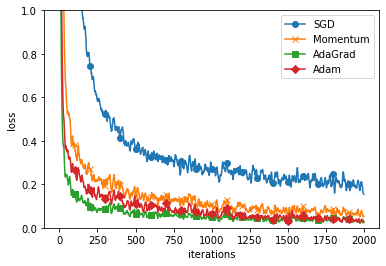

In [5]:
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

## 가중치의 초긱값

신경망 학습에서 특히 중요한 것이 가중치의 초깃값이다. 가중치의 초깃값을 무엇으로 설정하느냐가 신경마 학습의 성패를 가르는 일이 실제로 자주 있다. 

------

#### 초깃값을 0으로 할때 

가중치 감소, Weight deca 기법. 
가중치 감소는 가중치 매개변수의 값이 작아지도록 학습하는 방법이다. 가중치 값을 작게하여 오버피팅이 일어나지 않게 하는 것이다.  가중치를 작게 만들고 싶으면 초깃값도 최대한 작은 값에서 시작하는 것이 정공법이다. but 가중치의 초깃값을 모두 0으로 설정하면 좋지 않다. 학습이 올바르게 이루어지지 않기 때문이다. 
오차역전파에서 모든 가중치의 값이 똑같이 갱신되는 문제 또한 발생된다. 

## 은닉층 활성화 값 분포 

은닉층의 활성화값(활성화 함수의 출력 데이터)의 분포를 관찰하면 중요한 정보를 얻을 수 있다. 


In [6]:
# 가중치의 초깃값에 따라 은닉층 활성화 값들이 어떻게 변화하는지 관찰 
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

층이 5개가 있으며, 각 층의 뉴련은 100개씩이다. 입력 데이터로서 1000개의 데이터를 정규분포로 무작위로 생성하여 이 5층 신경망에 전달한다. 활성화 함수로는 시그모이드 함수를 이용했고, 각 층의 활성화 결과를 activation 변수에 저장

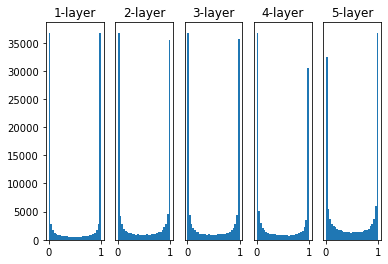

In [7]:
# 히스토그램 
import matplotlib.pyplot as plt

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

각 층의 활성화 값들이 0과 1에 치우쳐 분포되어 있다. 시그모이드 함수는 그 출력이 0에 가까워지자 그 미분은 0이 된다. 데이터가 0과 1에 치우쳐 분포하게 되면 역전파의 기울기 값이 점점 작아지다가 사라진다. 이것이 기울기 소실이라 알려진 문제이다. 층을 깊게 하는 딥러닝에서는 기울기 소실은 더 심각한 문제가 될 수있다. 

In [8]:
w = np.random.randn(node_num, node_num)*0.01

In [9]:
# 가중치 표준편차 변경 

input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    w = np.random.randn(node_num, node_num)*0.01
    # w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

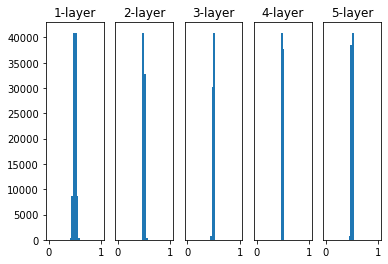

In [10]:
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

가중치 변경을 통해 값들이 0.5에 집중되어 나타났다. 다수의 뉴런이 거의 같은 값을 출력하고 있으니 뉴런을 여러 개 둔 의미가 없어진다는 의미를 내포한다.  

각 층의 활성화 값은 적당히 고루 분포되어야 한다. 층과 층 사이에 적당하게 다양한 데이터가 흐르게 해야 신경망 학습이 효율적로 이뤄지기 떄문이다. 반대로 치우친 데이터가 흐르면 기울기 소실이나 표현력 제한 문제에 빠져서 학습이 잘 이뤄지지 않은 경우가 있다. 

#### Xavier 초깃값 사용 
초깃값의 표준편차가 √1/n 이 되도록 설정 ,  Xavier 초깃값을 사용하면 앞 층에 노드가 많을 수록 대상 노드의 초깃값으로 설정하는 가중치가 좁게 퍼진다. 

In [11]:
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    #Xavier 초깃값 사용
    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

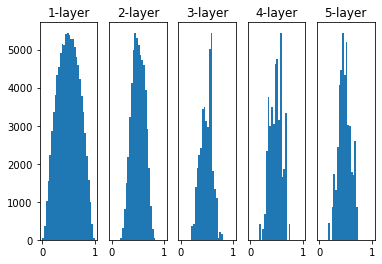

In [12]:
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

오른쪽으로 갈 수록 약간씩 분포가 일그러져있는 모습이다. 이는 sigmoid 대신 tanh 함수(쌍곡선함수)를 이용하면 개선된다. 실제로 tanh 함수를 이용하면 종모양으로 분포된다. tanh함수도 sigmoid 함수와 같은 S 자 모양 곡선 함수 이지만 tanh함수가 원점(0,0)에서 대칭인 S곡선인 반면   
sigmoid 함수는 (x,y)  = (0.05)에서 대칭인 S곡선이기 때문에 활성화 함수용으로는 원점에서 대칭인 함수가 바람직 하다고 알려져 있다.

## ReLU를 사용할 때의 가중치 초깃값 

Xavier 초깃값은 활성화 함수가 선형인 것을 전제로 이끈 결과이다. sigmoid 함수와 tanh함수는 좌우 대칭이라 중안 부근이 선형인 함수로 볼 수 있다. 그래서Xavier 초깃값이 적당하다. 반면 ReLU를 이용할 때는 ReLU에 특화된 초깃값을 이용하라고 권장 된다. 이 특화된 초깃값을 찾아낸 카이밍 히의 이름을 따 **He 초깃값이라 한다.** He 초깃값은 앞 계층의 노드가 n개일때 , √2/n 인 정규분포를 사용한다. ReLU는 음의 영역이 0이라서 더 넓게 분포시키기 위해 2배의 계수가 필요하다고 해석할 수 있다. 

In [13]:
w = np.random.randn(node_num, node_num)*0.01

In [14]:
import numpy as np

def ReLU(x):
    return np.maximum(0, x)

input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # ReLU초깃값 사용
   
    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
    
    z = ReLU(a)
    

    activations[i] = z

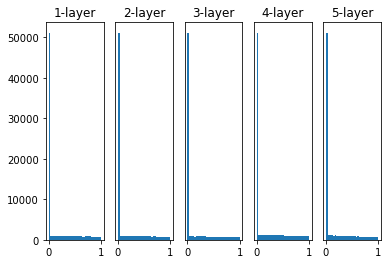

In [15]:
import matplotlib.pyplot as plt

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

결과를 보면 std = 0.01일 때의 각 층의 활성화값들은 아주 작은 값들이다. 신경망에 아주 작은 데이터가 흐른다는 것은 역전파 때 가중치의 기울기 역시 작아진다는 의미이다. 실제로도 학습이 거의 이뤄지지 않는다. 

## MNIST 데이터셋으로 본 가중치 초깃값 비교 

===========iteration:0===========
std=0.01:2.302530214538474
Xavier:2.296911743030763
He:2.3163311682616303
===========iteration:100===========
std=0.01:2.302547127308776
Xavier:2.2472393262793715
He:1.515780846849427
===========iteration:200===========
std=0.01:2.3011781386232917
Xavier:2.1414669611606456
He:0.8502458266118401
===========iteration:300===========
std=0.01:2.2989348005859087
Xavier:1.8844647528693304
He:0.47409218022474464
===========iteration:400===========
std=0.01:2.300775782314873
Xavier:1.408867308494953
He:0.4346096581507162
===========iteration:500===========
std=0.01:2.303533554630738
Xavier:0.980346259893234
He:0.4111571854828382
===========iteration:600===========
std=0.01:2.3033828962345293
Xavier:0.6389944361549358
He:0.2514782657713004
===========iteration:700===========
std=0.01:2.297080326258921
Xavier:0.506885369285853
He:0.2361635079622098
===========iteration:800===========
std=0.01:2.302045721462279
Xavier:0.4585133916955972
He:0.251282303606536
=====

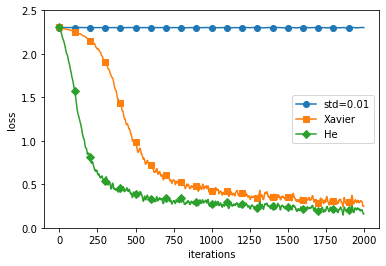

In [16]:
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

## 배치정규화 

* 학습을 빨리 진행할 수 있다.(학습 속도 개선)
* 초깃값에 크게 의존하지 않는다
* 오버피팅을 억제한다.(드롭 아웃 등의 필요성 감소) 

배치정규화의 기본 아이디어는 각 층에서의 활성화값이 적당히 분포되도록 조정하는 것이다. 

<img src="https://t1.daumcdn.net/cfile/tistory/997AE03A5AAAA64C2A" width="400" height="300"/> 

------ 

<img src="https://blog.kakaocdn.net/dn/ecXGZ9/btqJZndIoGW/imBN7xnDacMl0y8vxBH6d0/img.png" width="200" height="300"/> 


In [1]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100], output_size=10,
                              use_batchnorm=True)

x_batch = x_train[:1]
t_batch = t_train[:1]

grad_backprop = network.gradient(x_batch, t_batch)
grad_numerical = network.numerical_gradient(x_batch, t_batch)


for key in grad_numerical.keys():
    diff = np.average( np.abs(grad_backprop[key] - grad_numerical[key]) )
    print(key + ":" + str(diff))

W1:0.0
b1:0.0
gamma1:0.0
beta1:0.0
W2:0.0
b2:0.0
gamma2:0.0
beta2:0.06132966714236243
W3:0.0
b3:1.7990402263745597e-07


============== 1/16 ==============
epoch:0 | 0.097 - 0.116
epoch:1 | 0.097 - 0.113
epoch:2 | 0.097 - 0.132
epoch:3 | 0.097 - 0.145
epoch:4 | 0.097 - 0.161
epoch:5 | 0.097 - 0.19
epoch:6 | 0.097 - 0.197
epoch:7 | 0.097 - 0.226
epoch:8 | 0.097 - 0.25
epoch:9 | 0.097 - 0.268
epoch:10 | 0.097 - 0.281
epoch:11 | 0.097 - 0.292
epoch:12 | 0.097 - 0.307
epoch:13 | 0.097 - 0.329
epoch:14 | 0.097 - 0.344
epoch:15 | 0.097 - 0.358
epoch:16 | 0.097 - 0.356
epoch:17 | 0.097 - 0.389


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:18 | 0.097 - 0.401
epoch:19 | 0.097 - 0.413
============== 2/16 ==============
epoch:0 | 0.1 - 0.095
epoch:1 | 0.097 - 0.085
epoch:2 | 0.097 - 0.124
epoch:3 | 0.097 - 0.155
epoch:4 | 0.097 - 0.168
epoch:5 | 0.097 - 0.189
epoch:6 | 0.097 - 0.217
epoch:7 | 0.097 - 0.248
epoch:8 | 0.097 - 0.262
epoch:9 | 0.097 - 0.281
epoch:10 | 0.097 - 0.297
epoch:11 | 0.097 - 0.322
epoch:12 | 0.097 - 0.344
epoch:13 | 0.097 - 0.369
epoch:14 | 0.097 - 0.387
epoch:15 | 0.097 - 0.395
epoch:16 | 0.097 - 0.403
epoch:17 | 0.097 - 0.431


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:18 | 0.097 - 0.438
epoch:19 | 0.097 - 0.459
============== 3/16 ==============
epoch:0 | 0.101 - 0.123
epoch:1 | 0.385 - 0.141
epoch:2 | 0.545 - 0.142
epoch:3 | 0.636 - 0.183
epoch:4 | 0.667 - 0.221
epoch:5 | 0.734 - 0.271
epoch:6 | 0.806 - 0.304
epoch:7 | 0.845 - 0.328
epoch:8 | 0.875 - 0.358
epoch:9 | 0.905 - 0.391
epoch:10 | 0.922 - 0.432
epoch:11 | 0.941 - 0.462
epoch:12 | 0.951 - 0.481
epoch:13 | 0.963 - 0.506
epoch:14 | 0.97 - 0.526
epoch:15 | 0.977 - 0.548
epoch:16 | 0.984 - 0.558
epoch:17 | 0.986 - 0.59
epoch:18 | 0.99 - 0.607


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.989 - 0.626
============== 4/16 ==============
epoch:0 | 0.119 - 0.101
epoch:1 | 0.331 - 0.147
epoch:2 | 0.468 - 0.217
epoch:3 | 0.548 - 0.302
epoch:4 | 0.598 - 0.372
epoch:5 | 0.648 - 0.43
epoch:6 | 0.679 - 0.494
epoch:7 | 0.702 - 0.546
epoch:8 | 0.72 - 0.59
epoch:9 | 0.743 - 0.622
epoch:10 | 0.759 - 0.652
epoch:11 | 0.775 - 0.679
epoch:12 | 0.784 - 0.689
epoch:13 | 0.8 - 0.707
epoch:14 | 0.81 - 0.719
epoch:15 | 0.823 - 0.732
epoch:16 | 0.826 - 0.738
epoch:17 | 0.827 - 0.746
epoch:18 | 0.844 - 0.757


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.855 - 0.766
============== 5/16 ==============
epoch:0 | 0.111 - 0.107
epoch:1 | 0.122 - 0.128
epoch:2 | 0.127 - 0.301
epoch:3 | 0.146 - 0.452
epoch:4 | 0.162 - 0.533
epoch:5 | 0.178 - 0.588
epoch:6 | 0.192 - 0.643
epoch:7 | 0.199 - 0.679
epoch:8 | 0.206 - 0.708
epoch:9 | 0.208 - 0.736
epoch:10 | 0.208 - 0.763
epoch:11 | 0.212 - 0.783
epoch:12 | 0.219 - 0.805
epoch:13 | 0.224 - 0.817
epoch:14 | 0.233 - 0.832
epoch:15 | 0.258 - 0.839
epoch:16 | 0.266 - 0.849
epoch:17 | 0.269 - 0.858
epoch:18 | 0.276 - 0.868


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.275 - 0.877
============== 6/16 ==============
epoch:0 | 0.083 - 0.054
epoch:1 | 0.114 - 0.145
epoch:2 | 0.062 - 0.455
epoch:3 | 0.037 - 0.617
epoch:4 | 0.035 - 0.685
epoch:5 | 0.036 - 0.715
epoch:6 | 0.042 - 0.75
epoch:7 | 0.048 - 0.769
epoch:8 | 0.088 - 0.795
epoch:9 | 0.116 - 0.822
epoch:10 | 0.115 - 0.836
epoch:11 | 0.116 - 0.853
epoch:12 | 0.116 - 0.868
epoch:13 | 0.116 - 0.881
epoch:14 | 0.116 - 0.896
epoch:15 | 0.116 - 0.906
epoch:16 | 0.116 - 0.925
epoch:17 | 0.077 - 0.931
epoch:18 | 0.084 - 0.943


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.117 - 0.949
============== 7/16 ==============
epoch:0 | 0.116 - 0.093
epoch:1 | 0.116 - 0.185
epoch:2 | 0.116 - 0.571
epoch:3 | 0.116 - 0.709
epoch:4 | 0.116 - 0.782
epoch:5 | 0.116 - 0.811
epoch:6 | 0.116 - 0.85
epoch:7 | 0.116 - 0.887
epoch:8 | 0.116 - 0.9
epoch:9 | 0.116 - 0.93
epoch:10 | 0.116 - 0.947
epoch:11 | 0.116 - 0.957
epoch:12 | 0.116 - 0.961
epoch:13 | 0.116 - 0.969
epoch:14 | 0.116 - 0.975
epoch:15 | 0.116 - 0.983
epoch:16 | 0.116 - 0.985
epoch:17 | 0.116 - 0.987
epoch:18 | 0.117 - 0.991


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.116 - 0.994
============== 8/16 ==============
epoch:0 | 0.117 - 0.097
epoch:1 | 0.117 - 0.319
epoch:2 | 0.117 - 0.64
epoch:3 | 0.117 - 0.753
epoch:4 | 0.117 - 0.827
epoch:5 | 0.117 - 0.869
epoch:6 | 0.117 - 0.9
epoch:7 | 0.116 - 0.939
epoch:8 | 0.116 - 0.961
epoch:9 | 0.116 - 0.971
epoch:10 | 0.116 - 0.978
epoch:11 | 0.117 - 0.986
epoch:12 | 0.117 - 0.99
epoch:13 | 0.116 - 0.99
epoch:14 | 0.117 - 0.995
epoch:15 | 0.116 - 0.998
epoch:16 | 0.116 - 0.997
epoch:17 | 0.116 - 0.998
epoch:18 | 0.116 - 0.998
epoch:19 | 0.116 - 0.997


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


============== 9/16 ==============
epoch:0 | 0.093 - 0.132
epoch:1 | 0.117 - 0.476
epoch:2 | 0.117 - 0.724
epoch:3 | 0.117 - 0.807
epoch:4 | 0.117 - 0.879
epoch:5 | 0.117 - 0.901
epoch:6 | 0.117 - 0.955
epoch:7 | 0.117 - 0.975
epoch:8 | 0.117 - 0.981
epoch:9 | 0.117 - 0.988
epoch:10 | 0.117 - 0.993
epoch:11 | 0.117 - 0.997
epoch:12 | 0.117 - 0.995
epoch:13 | 0.117 - 0.998
epoch:14 | 0.117 - 0.998
epoch:15 | 0.117 - 0.999
epoch:16 | 0.117 - 0.999
epoch:17 | 0.117 - 1.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:18 | 0.117 - 1.0
epoch:19 | 0.117 - 1.0
============== 10/16 ==============
epoch:0 | 0.116 - 0.192
epoch:1 | 0.116 - 0.498
epoch:2 | 0.116 - 0.669
epoch:3 | 0.116 - 0.835
epoch:4 | 0.117 - 0.884
epoch:5 | 0.117 - 0.928
epoch:6 | 0.117 - 0.963
epoch:7 | 0.117 - 0.965
epoch:8 | 0.117 - 0.977
epoch:9 | 0.117 - 0.984
epoch:10 | 0.117 - 0.988
epoch:11 | 0.117 - 0.987
epoch:12 | 0.117 - 0.992
epoch:13 | 0.117 - 0.994
epoch:14 | 0.117 - 0.996
epoch:15 | 0.117 - 0.995
epoch:16 | 0.117 - 0.995
epoch:17 | 0.117 - 0.998


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:18 | 0.117 - 0.998
epoch:19 | 0.117 - 0.998
============== 11/16 ==============
epoch:0 | 0.117 - 0.167
epoch:1 | 0.117 - 0.475
epoch:2 | 0.117 - 0.517
epoch:3 | 0.117 - 0.555
epoch:4 | 0.117 - 0.512
epoch:5 | 0.117 - 0.691
epoch:6 | 0.117 - 0.721
epoch:7 | 0.117 - 0.785
epoch:8 | 0.117 - 0.761
epoch:9 | 0.117 - 0.791
epoch:10 | 0.117 - 0.85
epoch:11 | 0.117 - 0.855
epoch:12 | 0.117 - 0.872
epoch:13 | 0.117 - 0.876
epoch:14 | 0.117 - 0.861
epoch:15 | 0.117 - 0.875
epoch:16 | 0.117 - 0.88
epoch:17 | 0.117 - 0.886
epoch:18 | 0.117 - 0.896


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.117 - 0.841
============== 12/16 ==============
epoch:0 | 0.116 - 0.168
epoch:1 | 0.117 - 0.13
epoch:2 | 0.117 - 0.607
epoch:3 | 0.116 - 0.666
epoch:4 | 0.117 - 0.651
epoch:5 | 0.117 - 0.656
epoch:6 | 0.117 - 0.699
epoch:7 | 0.116 - 0.778
epoch:8 | 0.116 - 0.789
epoch:9 | 0.116 - 0.769
epoch:10 | 0.116 - 0.793
epoch:11 | 0.116 - 0.803
epoch:12 | 0.116 - 0.831
epoch:13 | 0.117 - 0.87
epoch:14 | 0.117 - 0.891
epoch:15 | 0.116 - 0.888
epoch:16 | 0.117 - 0.896
epoch:17 | 0.117 - 0.887
epoch:18 | 0.116 - 0.888


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.116 - 0.897
============== 13/16 ==============
epoch:0 | 0.117 - 0.136
epoch:1 | 0.117 - 0.428
epoch:2 | 0.116 - 0.478
epoch:3 | 0.116 - 0.586
epoch:4 | 0.116 - 0.628
epoch:5 | 0.117 - 0.613
epoch:6 | 0.117 - 0.653
epoch:7 | 0.116 - 0.681
epoch:8 | 0.117 - 0.674
epoch:9 | 0.116 - 0.659
epoch:10 | 0.116 - 0.655
epoch:11 | 0.117 - 0.659
epoch:12 | 0.116 - 0.717
epoch:13 | 0.116 - 0.708
epoch:14 | 0.116 - 0.711
epoch:15 | 0.116 - 0.707
epoch:16 | 0.116 - 0.71
epoch:17 | 0.116 - 0.706
epoch:18 | 0.116 - 0.798


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.116 - 0.717
============== 14/16 ==============
epoch:0 | 0.116 - 0.14
epoch:1 | 0.116 - 0.352
epoch:2 | 0.117 - 0.559
epoch:3 | 0.116 - 0.573
epoch:4 | 0.117 - 0.545
epoch:5 | 0.116 - 0.605
epoch:6 | 0.117 - 0.608
epoch:7 | 0.117 - 0.583
epoch:8 | 0.117 - 0.609
epoch:9 | 0.117 - 0.622
epoch:10 | 0.117 - 0.612
epoch:11 | 0.117 - 0.62
epoch:12 | 0.117 - 0.682
epoch:13 | 0.117 - 0.692
epoch:14 | 0.117 - 0.672
epoch:15 | 0.117 - 0.689
epoch:16 | 0.117 - 0.712
epoch:17 | 0.117 - 0.641
epoch:18 | 0.117 - 0.71


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.117 - 0.695
============== 15/16 ==============
epoch:0 | 0.117 - 0.147
epoch:1 | 0.117 - 0.411
epoch:2 | 0.117 - 0.506
epoch:3 | 0.117 - 0.448
epoch:4 | 0.117 - 0.529
epoch:5 | 0.117 - 0.582
epoch:6 | 0.117 - 0.58
epoch:7 | 0.117 - 0.579
epoch:8 | 0.117 - 0.603
epoch:9 | 0.117 - 0.599
epoch:10 | 0.117 - 0.606
epoch:11 | 0.117 - 0.612
epoch:12 | 0.117 - 0.615
epoch:13 | 0.117 - 0.602
epoch:14 | 0.117 - 0.615
epoch:15 | 0.117 - 0.616
epoch:16 | 0.117 - 0.612
epoch:17 | 0.117 - 0.623


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:18 | 0.117 - 0.628
epoch:19 | 0.117 - 0.66
============== 16/16 ==============
epoch:0 | 0.099 - 0.099
epoch:1 | 0.087 - 0.242
epoch:2 | 0.116 - 0.374
epoch:3 | 0.116 - 0.388
epoch:4 | 0.116 - 0.386
epoch:5 | 0.116 - 0.504
epoch:6 | 0.116 - 0.505
epoch:7 | 0.116 - 0.506
epoch:8 | 0.116 - 0.51
epoch:9 | 0.116 - 0.514
epoch:10 | 0.116 - 0.51
epoch:11 | 0.116 - 0.514
epoch:12 | 0.116 - 0.518
epoch:13 | 0.116 - 0.521
epoch:14 | 0.116 - 0.521
epoch:15 | 0.116 - 0.52
epoch:16 | 0.116 - 0.521
epoch:17 | 0.116 - 0.522
epoch:18 | 0.116 - 0.521
epoch:19 | 0.117 - 0.521


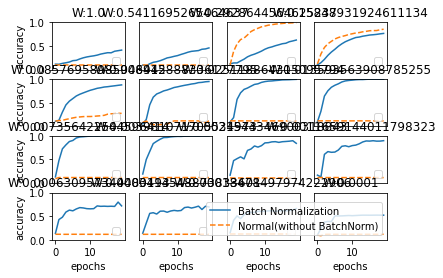

In [4]:
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 그래프 그리기==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()

거의 모든 경우에서 배치 정규화를 사용할 때의 학습 진도가 빠른 것으로 나타난다. 실제로 배치 정규화를 이용하지 않는 경우엔 초깃값이 잘 분포되어 있지 않으면 학습이 전혀 진행되지 않는 모습도 확인할 수 있다.

## 오버피팅 

오버피팅이란 신경망이 훈련데이터에만 지나치게 적응되어 그 외의 데이터에는 제대로 대응하지 못하는 상태를 말한다. 

* 발생하는 원인 
* 매개변수가 많고 표현력이 높은모델
* 훈련데이터가 적음 

## 가중치 감소 

학습 과정에서 큰 가중치에 대해서는 그에 상응하는 큰 페널티를 부과하여 오버피팅을 억제하는 방법이다. 원래 오버피팅은 가중치 매개변수의 값이 커서 발생하는 경우가 많기 때문이다.   


 Weight decay는 학습된 모델의 복잡도를 줄이기 위해서 학습 중 weight가 너무 큰 값을 가지지 않도록 Loss function에 Weight가 커질경우에 대한 패널티 항목을 집어넣는다. 이 패널티 항목으로 많이 쓰이는 것이 L1 Regularization과 L2 Regularization


epoch:0, train acc:0.09, test acc:0.0901
epoch:1, train acc:0.11, test acc:0.1035
epoch:2, train acc:0.13333333333333333, test acc:0.1186
epoch:3, train acc:0.17333333333333334, test acc:0.1353
epoch:4, train acc:0.17333333333333334, test acc:0.1385
epoch:5, train acc:0.20666666666666667, test acc:0.1495
epoch:6, train acc:0.25, test acc:0.1601
epoch:7, train acc:0.29333333333333333, test acc:0.1718
epoch:8, train acc:0.30333333333333334, test acc:0.1823
epoch:9, train acc:0.32666666666666666, test acc:0.1978
epoch:10, train acc:0.35, test acc:0.2183
epoch:11, train acc:0.3933333333333333, test acc:0.2305
epoch:12, train acc:0.4266666666666667, test acc:0.2525
epoch:13, train acc:0.43666666666666665, test acc:0.2674
epoch:14, train acc:0.47, test acc:0.2876
epoch:15, train acc:0.46, test acc:0.293
epoch:16, train acc:0.4533333333333333, test acc:0.2992
epoch:17, train acc:0.49666666666666665, test acc:0.313
epoch:18, train acc:0.49666666666666665, test acc:0.329
epoch:19, train acc:0.5

epoch:162, train acc:0.8433333333333334, test acc:0.6715
epoch:163, train acc:0.85, test acc:0.6632
epoch:164, train acc:0.85, test acc:0.67
epoch:165, train acc:0.84, test acc:0.6536
epoch:166, train acc:0.83, test acc:0.6703
epoch:167, train acc:0.8333333333333334, test acc:0.671
epoch:168, train acc:0.8433333333333334, test acc:0.6781
epoch:169, train acc:0.8533333333333334, test acc:0.6599
epoch:170, train acc:0.8266666666666667, test acc:0.6533
epoch:171, train acc:0.84, test acc:0.666
epoch:172, train acc:0.85, test acc:0.6626
epoch:173, train acc:0.8633333333333333, test acc:0.6601
epoch:174, train acc:0.8433333333333334, test acc:0.6644
epoch:175, train acc:0.8366666666666667, test acc:0.6596
epoch:176, train acc:0.8433333333333334, test acc:0.6749
epoch:177, train acc:0.84, test acc:0.6768
epoch:178, train acc:0.8533333333333334, test acc:0.6713
epoch:179, train acc:0.8433333333333334, test acc:0.6733
epoch:180, train acc:0.86, test acc:0.6773
epoch:181, train acc:0.86, test a

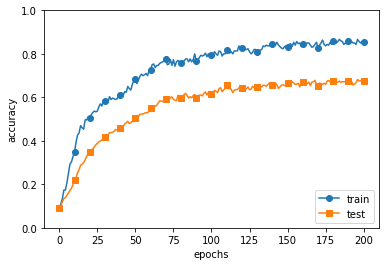

In [13]:
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
#weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

## 드롭아웃 

드롭아웃은 뉴런을 임의로 삭제하면서  학습하는 방법이다. 훈련 때 은닉층의 뉴런을 무작위로 골라 삭제한다. 삭제된 뉴련은 신호를 전달하지 못하게 된다. 훈련 때는 데이터를 흘릴 때마나 삭제할 뉴런을 무작위로 선택하고 시험 때는 모든 뉴런에 신호를 전달한다. 단 시험 때는 각 뉴런의 출력에 훈련 때 삭제 안 한 비율을 곱하여 출력한다. 

<img src="https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2F3S4jq%2FbtrhVZcFzHi%2FkPnaKdMCvhHoknqgwWQ4p1%2Fimg.png" width="400" height="300"/> 


train loss:2.3010378131691143
=== epoch:1, train acc:0.11333333333333333, test acc:0.1001 ===
train loss:2.3341180269493647
train loss:2.3169282373046762
train loss:2.309313009874254
=== epoch:2, train acc:0.11666666666666667, test acc:0.0995 ===
train loss:2.322083161890163
train loss:2.322217372464015
train loss:2.3189297278864847
=== epoch:3, train acc:0.11666666666666667, test acc:0.0995 ===
train loss:2.3217121138986254
train loss:2.3227081676562467
train loss:2.3125572043494853
=== epoch:4, train acc:0.12333333333333334, test acc:0.0995 ===
train loss:2.3284523490727973
train loss:2.3007010731691646
train loss:2.322643437252113
=== epoch:5, train acc:0.12, test acc:0.0997 ===
train loss:2.3004321489092465
train loss:2.3165878635287864
train loss:2.316826629346088
=== epoch:6, train acc:0.12, test acc:0.1001 ===
train loss:2.300803070961142
train loss:2.3324053378862786
train loss:2.3166318344383727
=== epoch:7, train acc:0.12, test acc:0.1001 ===
train loss:2.3234938064898087
tra

=== epoch:57, train acc:0.20666666666666667, test acc:0.1895 ===
train loss:2.2809672353145554
train loss:2.2592388988707692
train loss:2.248971650487434
=== epoch:58, train acc:0.21, test acc:0.1913 ===
train loss:2.2716896762879664
train loss:2.259143033068683
train loss:2.2758145672282537
=== epoch:59, train acc:0.21666666666666667, test acc:0.1912 ===
train loss:2.285702505703364
train loss:2.265865840549274
train loss:2.264030348345127
=== epoch:60, train acc:0.21, test acc:0.194 ===
train loss:2.278634567251085
train loss:2.2644464054212525
train loss:2.276165243757481
=== epoch:61, train acc:0.22, test acc:0.197 ===
train loss:2.2654942811924372
train loss:2.269883280777629
train loss:2.2753553917473206
=== epoch:62, train acc:0.21666666666666667, test acc:0.1974 ===
train loss:2.2706276559084015
train loss:2.2596928489123966
train loss:2.2639113036888188
=== epoch:63, train acc:0.21666666666666667, test acc:0.1977 ===
train loss:2.2616540307725477
train loss:2.275703766653061
t

train loss:2.193486309533746
=== epoch:113, train acc:0.30333333333333334, test acc:0.264 ===
train loss:2.197119064675363
train loss:2.2074509944372083
train loss:2.2256047203036915
=== epoch:114, train acc:0.30333333333333334, test acc:0.2667 ===
train loss:2.21506910820618
train loss:2.2156990525241285
train loss:2.201592192240872
=== epoch:115, train acc:0.31333333333333335, test acc:0.2747 ===
train loss:2.1962963523714563
train loss:2.1970993115095006
train loss:2.190513583651844
=== epoch:116, train acc:0.31333333333333335, test acc:0.2715 ===
train loss:2.2059689502626494
train loss:2.2274522014609177
train loss:2.1898004503347774
=== epoch:117, train acc:0.31, test acc:0.2741 ===
train loss:2.2040144629728347
train loss:2.2314624545693538
train loss:2.202152676748402
=== epoch:118, train acc:0.33, test acc:0.2818 ===
train loss:2.2273287687648264
train loss:2.23059424804041
train loss:2.2068119973204237
=== epoch:119, train acc:0.32666666666666666, test acc:0.2832 ===
train lo

=== epoch:169, train acc:0.37333333333333335, test acc:0.327 ===
train loss:2.0948763947775864
train loss:2.019749118529149
train loss:2.0645389074363343
=== epoch:170, train acc:0.37666666666666665, test acc:0.3269 ===
train loss:2.1002650484339
train loss:2.0478263528616067
train loss:2.083590095302708
=== epoch:171, train acc:0.37666666666666665, test acc:0.3277 ===
train loss:2.111354822061336
train loss:2.06899183200952
train loss:2.132334010116023
=== epoch:172, train acc:0.38, test acc:0.3325 ===
train loss:2.0317897321019247
train loss:2.078921644764218
train loss:2.023869971696154
=== epoch:173, train acc:0.38, test acc:0.3317 ===
train loss:2.136191394133884
train loss:2.02903367039017
train loss:2.1098020971788864
=== epoch:174, train acc:0.38, test acc:0.3363 ===
train loss:2.0476282789496394
train loss:2.0352502212418004
train loss:2.0698602536528656
=== epoch:175, train acc:0.38666666666666666, test acc:0.3386 ===
train loss:2.061750469963788
train loss:2.0210947780181963

=== epoch:224, train acc:0.42, test acc:0.3809 ===
train loss:1.8458056155517482
train loss:1.8675791725281576
train loss:1.6184329384719016
=== epoch:225, train acc:0.42, test acc:0.381 ===
train loss:1.8030492404285408
train loss:1.792244397864681
train loss:1.7993384932017475
=== epoch:226, train acc:0.42333333333333334, test acc:0.3811 ===
train loss:1.8477554253587507
train loss:1.877944483896289
train loss:1.8519479636306482
=== epoch:227, train acc:0.43333333333333335, test acc:0.3839 ===
train loss:1.797329726943413
train loss:1.8425160228835122
train loss:1.8614531832693253
=== epoch:228, train acc:0.43666666666666665, test acc:0.3856 ===
train loss:1.7602479220533491
train loss:1.7933354855177617
train loss:1.7736791157151774
=== epoch:229, train acc:0.43, test acc:0.3863 ===
train loss:1.773368295888801
train loss:1.7647587895708385
train loss:1.7776980619150862
=== epoch:230, train acc:0.43333333333333335, test acc:0.3866 ===
train loss:1.8399184521743839
train loss:1.74556

=== epoch:279, train acc:0.49666666666666665, test acc:0.435 ===
train loss:1.5280803246871522
train loss:1.4521305752659328
train loss:1.4613399345096412
=== epoch:280, train acc:0.5, test acc:0.436 ===
train loss:1.3579781948913225
train loss:1.5151130420023395
train loss:1.4102143658883879
=== epoch:281, train acc:0.5, test acc:0.4354 ===
train loss:1.5877032350063507
train loss:1.4644852598843834
train loss:1.6077068810308581
=== epoch:282, train acc:0.5, test acc:0.4353 ===
train loss:1.421941578793757
train loss:1.5874255914719135
train loss:1.5279503504321954
=== epoch:283, train acc:0.5, test acc:0.4359 ===
train loss:1.4341828485357553
train loss:1.689703806558629
train loss:1.5629564714675659
=== epoch:284, train acc:0.5033333333333333, test acc:0.437 ===
train loss:1.492182537803661
train loss:1.7008552738861917
train loss:1.4915829963927434
=== epoch:285, train acc:0.5, test acc:0.4393 ===
train loss:1.5923715025269944
train loss:1.5021196401042525
train loss:1.456115206732

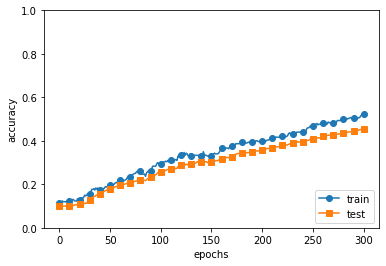

In [15]:
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer


(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비울 설정 ========================
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

머신러닝에서는 **앙상블 학습**을 애용한다. 앙상블 학습은 개별적으로 학습시킨 여러 모델의 출력을 평균 내어 추론하는 방식이다. 신경망의 맥락에서 얘기하면, 가령 같은 구조의 네트워크를 5개 준비하여 따로 따로 학습 시키고 시험 때는 그 5개의 출력을 평균 내어 답하는 것이다.   

앙상블 학습은 드롭아웃과 밀접하다. 드롭아웃이 학습 때 뉴련을 무작위로 삭제하는 행위를 매번 다른 모델을 학습 시키는 것으로 해석할 수 있기 때문이다. 또한 추론 때는 뉴런의 출력에 삭제한 비율을 곱합으로써 앙상블 학습에서 여러 모델의 평균을 내는 것과 같은 효과를 얻는 것이다. 

## 적절한 하이퍼파라미터 값 찾기 



### 검증데이터 

하이퍼파라미터 성능을 평가하기 위해 검증 데이터셋 사용, 시험 데이터를 사용하여 하이퍼파라미터를 조정하면 하이퍼파라미터 값이 시험 데이터에 오버피팅 되기 때문에 사용하면 안된다. 

* 훈련데이터 - 매개변수 학습
* 검증데이터 - 하이퍼파라미터 성능평가
* 시험데이터 - 신경망의 범용 성능평가 

In [16]:
from common.util import shuffle_dataset

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 훈련데이터 셔플 
x_train, t_train = shuffle_dataset(x_train, t_train)

# 20%를 검증 데이터로 사용 
validation_ratio = 0.2
validation_num = int(x_train.shape[0] * validation_ratio)

x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num :]
t_train = t_train[validation_num: ]

### 하이퍼파라미터 최적화 

하이퍼파라미터의 최적 값이 존재하는 범위를 조금 씩 줄여가는게 핵심이다. 범위를 조금씩 줄이려면 우선 대략적인 범위를 설정하고 그 범위에서 무작위로 하이퍼파라미터 값을 골라낸 후, 그 값으로 정확도를 평가한다. 

하이퍼파라미터의 범위는 대략적으로 지정하는 것이 효과적이다. 0.001 ~ 1000 사이와 같이 10의 거듭제곱 단위로 범위를 지정한다. 이를 로그스케일로 지정한다고 한다. 

0. 하이퍼파라미터 값의 범위를 설정 
1. 설정된 범위에서 하이퍼파라미터의 값을 무작위로 추출
2. 1단계에서 샘플링한 하이퍼파라미터 값을 사용하여 학습하고, 검증 데이터로 정확도를 평가 
3. 1단계와 2단계를 특정 횟수 반복하여, 그 정확도의 결과를 보고 하이퍼파라미터의 범위를 좁힌다.

val acc:0.53 | lr:0.002636872015199253, weight decay:5.931732177699259e-07
val acc:0.34 | lr:0.002358461912099458, weight decay:3.083323539306367e-05
val acc:0.1 | lr:2.6631506663077725e-06, weight decay:9.601692969033852e-05
val acc:0.09 | lr:1.447689485555053e-06, weight decay:2.148702270908024e-07
val acc:0.41 | lr:0.0019101004488546007, weight decay:7.745063554337742e-07
val acc:0.07 | lr:0.00016626110083567335, weight decay:1.6487125622833612e-07
val acc:0.25 | lr:0.0010583793478097204, weight decay:1.0666453508898406e-06
val acc:0.15 | lr:0.0005816655989080584, weight decay:7.592536077630084e-05
val acc:0.1 | lr:0.00036160732274512377, weight decay:9.546319337399624e-08
val acc:0.08 | lr:0.0005866167346073571, weight decay:1.560878583755703e-06
val acc:0.08 | lr:1.7060846877182147e-05, weight decay:1.1764370244902035e-08
val acc:0.08 | lr:0.0001687666262490324, weight decay:4.704317068558619e-06
val acc:0.12 | lr:0.00019970805873437215, weight decay:9.003798144971069e-07
val acc:

Best-20(val acc:0.34) | lr:0.002358461912099458, weight decay:3.083323539306367e-05


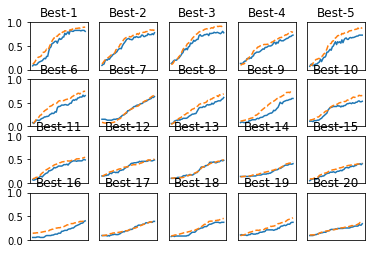

In [17]:
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# 그래프 그리기========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()

### 정리 
* 매개변수 갱신 방법에는 확률적 경사 하강법(SGD) 외에도 모멘텀, AdaGrad, Adam 등이 있다.
* 가중치 초깃값을 정하는 방법은 올바른 학습을 하는 데 매우 중요하다.
* 가중치의 초깃값으로는 ‘Xavier 초깃값’과 ‘He 초깃값’이 효과적이다.
* 배치 정규화를 이용하면 학습을 빠르게 진행할 수 있으며, 초깃값에 영향을 덜 받게 된다.
* 오버피팅을 억제하는 정규화 기술로는 가중치 감소와 드롭아웃이 있다.
* 하이퍼파라미터 값 탐색은 최적 값이 존재할 법한 범위를 점차 좁히면서 하는 것이 효과적이다.